In [4]:
%matplotlib inline

In [5]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

In [6]:
db_dir = "/data1/kji/databases2"

In [4]:
def get_counts(db_file):
    """given a database, returns a dictionary mapping each piece to the number of unique fingerprints it has in IMSLP"""
    with open(f"{db_dir}/{db_file}", "rb") as f:
        d = pickle.load(f)
    counts = defaultdict(int)
    for fp in d:
        for piece in d[fp]:
            counts[piece] += 1
    return counts

In [5]:
def get_coverage(counts, total_pieces):
    """
    given a dictionary of counts, return an array where a[i] is the percent of 
    items in IMSLP with at least i+1 unique fingerprints
    """
    num_pieces_per_count = defaultdict(int)
    for num in counts.values():
        num_pieces_per_count[num] += 1
    n = max(num_pieces_per_count)
    cumulative_counts = []
    cur_count = 0
    for i in reversed(range(1, n+1)):
        cur_count += num_pieces_per_count[i]
        cumulative_counts.append(cur_count)
    return [count / total_pieces for count in cumulative_counts[::-1]]

In [ ]:
counts = get_counts("split21_Bt_200mill.pkl")

In [27]:
with open("num_to_piece.pkl", 'rb') as f:
    num_to_piece = pickle.load(f)

In [28]:
total = len(num_to_piece)

In [29]:
percents = get_coverage(counts, total)

In [30]:
with open("data/percent_split21.pkl", "wb") as f:
    pickle.dump(percents, f)

In [31]:
sns.set(style='whitegrid')

In [13]:
with open("data/percent_split1.pkl", 'rb') as f:
    percents1 = pickle.load(f)

In [14]:
with open("data/percent_split2.pkl", 'rb') as f:
    percents2 = pickle.load(f)

In [15]:
with open("data/percent_split21.pkl", 'rb') as f:
    percents3 = pickle.load(f)

In [16]:
with open("data/percent_140mill.pkl", 'rb') as f:
    percents4 = pickle.load(f)

/home/kji/anaconda3/envs/SheetMidiSearchRetrieval/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/kji/anaconda3/envs/SheetMidiSearchRetrieval/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


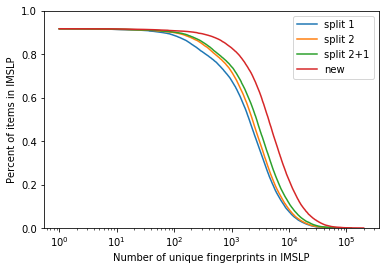

In [17]:
plt.plot(range(1, len(percents1) + 1), percents1, label="split 1")
plt.plot(range(1, len(percents2) + 1), percents2, label="split 2")
plt.plot(range(1, len(percents3) + 1), percents3, label="split 2+1")
plt.plot(range(1, len(percents4) + 1), percents4, label="new")
plt.xscale("log")
plt.xlabel("Number of unique fingerprints in IMSLP")
plt.ylabel("Percent of items in IMSLP")
plt.ylim((0, 1))
plt.legend()

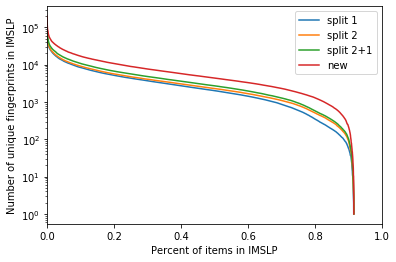

In [18]:
plt.plot(percents1, range(1, len(percents1) + 1), label="split 1")
plt.plot(percents2, range(1, len(percents2) + 1), label="split 2")
plt.plot(percents3, range(1, len(percents3) + 1), label="split 2+1")
plt.plot(percents4, range(1, len(percents4) + 1), label="new")
plt.yscale("log")
plt.ylabel("Number of unique fingerprints in IMSLP")
plt.xlabel("Percent of items in IMSLP")
plt.xlim((0, 1))
plt.legend()